In [10]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
def pr(df):
    p = pandas_profiling.ProfileReport(df)
    return p  

In [12]:
smart = ['sex', 'hisp', 'age', 'educ2', 'inc', 'racem1', 'smart2']

In [13]:
jan18_smart = pd.read_csv("./Jan18/jan18.csv", usecols = smart)

In [14]:
smart = jan18_smart['smart2']

In [15]:
def pct(series, dropna):
    '''
    Return series of percentage distribution & histogram.
    '''
    vals = series.value_counts(dropna = dropna)
    N = sum(vals)
    s = vals/N*100
    
    print("printing series:", round(s,0))

In [16]:
def mapping(df, orig, new, d, pct):
    '''
    
    '''
    series = df[orig]
    series_new = series.map(d)
    print(pct(series_new, False))
    
    new_df = df.drop(orig, axis = 1, inplace = False)
    new_df[new] = series_new
    return new_df

### Age 

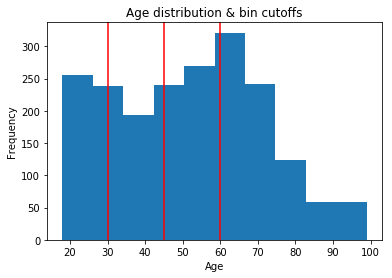

In [17]:
ax = jan18_smart['age'].plot(kind = 'hist')
plt.xlabel('Age')
plt.title('Age distribution & bin cutoffs')
ax.axes.axvline(x=30, color = 'r')
ax.axes.axvline(x=45, color = 'r')
ax.axes.axvline(x=60, color = 'r')
plt.savefig('age.png')

In [18]:
def bin_age(df, lower, upper, new):
    '''
    If lower < age <= upper put in bin 'new'.
    '''
    df.loc[(df['age'] > lower) & (df['age']<= upper), 'age'] = new

In [20]:
bin_age(jan18_smart, 0, 30, 1)

In [23]:
bin_age(jan18_smart,30, 45,2)
bin_age(jan18_smart,45, 60, 3)
bin_age(jan18_smart,60, 97, 4)
bin_age(jan18_smart,97, 100, 0)

### Others

In [24]:
smart_d = {'1' : 1, '2': 2, ' ':3, '8':0, '9':0}
smart = ['smart2', 'phone', smart_d]
# blank means landline sample and answered no to Device1a ("do you have a cell phone?")

In [25]:
educ_d = {1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 98: 0, 99: 0}
educ = ['educ2', 'educ', educ_d]

In [26]:
hisp_d = {1:1, 2:2, 8:0, 9:0}
hisp = ['hisp', 'hisp', hisp_d]

In [27]:
inc_d = {1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 98: 0, 99: 0}
inc = ['inc', 'inc', inc_d]

In [28]:
#race_d = {1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:0, 9:0}
race_d = {1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:0, 9:0}
race = ['racem1', 'race', race_d]

In [29]:
def new_df(df, l, pct):
    '''
    Given a df and a list, return the new df.
    '''
    orig, new, d = l
    new = mapping(df, orig, new, d, pct)
    return new

In [30]:
def loop(DF, lists, new_df, pct):
    df = DF
    for l in lists:
        new = new_df(df, l, pct)
        df = new
    return df

In [31]:
lists = [smart, educ, hisp, inc, race]

In [32]:
jan18_smart_after = loop(jan18_smart, lists, new_df, pct)

printing series: 1    77.0
2    18.0
3     3.0
0     1.0
Name: smart2, dtype: float64
None
printing series: 6    24.0
3    23.0
4    16.0
5    11.0
7     9.0
8     7.0
2     5.0
1     3.0
0     2.0
Name: educ2, dtype: float64
None
printing series: 2    82.0
1    16.0
0     2.0
Name: hisp, dtype: float64
None
printing series: 0    17.0
6    11.0
9    11.0
8    11.0
3    10.0
7    10.0
2     9.0
4     8.0
1     7.0
5     6.0
Name: inc, dtype: float64
None
printing series: 1    68.0
2    14.0
7     7.0
0     5.0
3     4.0
5     1.0
4     1.0
6     0.0
Name: racem1, dtype: float64
None


### Remove rows with zeros 

In [33]:
df = jan18_smart_after

In [34]:
df.shape

(2002, 7)

In [35]:
df_removed_rows = df[(df.age != 0) & (df.educ !=0) & (df.hisp != 0) & (df.inc != 0) & (df.phone != 0) & (df.race != 0 )]

In [36]:
df_removed_rows.shape

(1567, 7)

In [37]:
df_r = df_removed_rows

In [38]:
df_r.describe()

,sex,age,phone,educ,hisp,inc,race
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,1.455648,2.711551,1.219528,4.818124,1.844927,5.287811,1.753669
std,0.498188,1.117497,0.479784,1.785633,0.362090,2.583126,1.664926
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,3.000000,2.000000,3.000000,1.000000
50%,1.000000,3.000000,1.000000,5.000000,2.000000,6.000000,1.000000
75%,2.000000,4.000000,1.000000,6.000000,2.000000,8.000000,2.000000
max,2.000000,4.000000,3.000000,8.000000,2.000000,9.000000,7.000000


### Binarize label. Simple analysis 

Text(0.5,1,'Cell phone histogram')

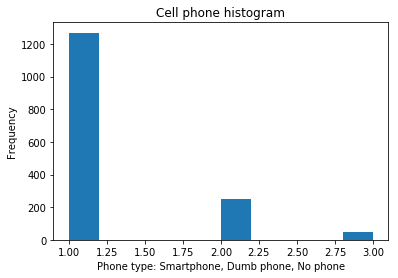

In [39]:
df_r.phone.plot(kind = 'hist')
plt.xlabel('Phone type: Smartphone, Dumb phone, No phone')
plt.title('Cell phone histogram')

In [40]:
smart_bin_d = {0:0, 1 : 0, 2: 1, 3:1}
smart_bin = ['phone', 'smart_bin', smart_bin_d]

In [41]:
df_r_bin = mapping(df_r, smart_bin[0], smart_bin[1], smart_bin[2], pct)

printing series: 0    81.0
1    19.0
Name: phone, dtype: float64
None


In [42]:
pr(df_r_bin)

Number of variables,8
Number of observations,1567
Total Missing (%),0.0%
Total size in memory,98.0 KiB
Average record size in memory,64.1 B
Numeric,5
Categorical,0
Boolean,3
Date,0
Text (Unique),0
Rejected,0


In [43]:
df_r_bin.describe()

,sex,age,educ,hisp,inc,race,smart_bin
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,1.455648,2.711551,4.818124,1.844927,5.287811,1.753669,0.190172
std,0.498188,1.117497,1.785633,0.362090,2.583126,1.664926,0.392562
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,2.000000,3.000000,2.000000,3.000000,1.000000,0.000000
50%,1.000000,3.000000,5.000000,2.000000,6.000000,1.000000,0.000000
75%,2.000000,4.000000,6.000000,2.000000,8.000000,2.000000,0.000000
max,2.000000,4.000000,8.000000,2.000000,9.000000,7.000000,1.000000


In [44]:
y = df_r_bin['smart_bin']

In [45]:
X = df_r_bin.drop('smart_bin', axis = 1)

In [46]:
X_v = X.loc[:,].values
y_v = y.loc[:,].values

In [47]:
import statsmodels.api as sm
import numpy as np
# Add a constant to the numpy array
num_obs = X_v.shape[0]
const_vec = np.ones(num_obs).reshape((num_obs, 1))
XplusConst = np.hstack((const_vec, X_v))

LogitModel = sm.Logit(y_v, XplusConst)
LogitReg_sm = LogitModel.fit()
yname = 'no smartphone'
xname = ['sex', 'age', 'educ', 'hisp', 'inc', 'race']
LogitReg_sm.summary(yname, xname, 'Logistic Regression')

/Users/laurencewarner/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.378123
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logistic Regression                              
==============================================================================
Dep. Variable:          no smartphone   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1560
Method:                           MLE   Df Model:                            6
Date:                Wed, 25 Jul 2018   Pseudo R-squ.:                  0.2227
Time:                        01:45:30   Log-Likelihood:                -592.52
converged:                       True   LL-Null:                       -762.30
                                        LLR p-value:                 2.677e-70
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -2.7108      0.660     -4.105      0.000      -4.005      -1.416
age            0.0741      0.148      0.500      0.617      -0.217       0.365
educ           0.9605      0.083     11.572      0.000       0.798       1.123
hisp          -0.2292      0.049     -4.707      0.000      -0.325      -0.134
inc            0.4006      0.272      1.470      0.141      -0.133       0.934
race          -0.2983      0.035     -8.575      0.000      -0.366      -0.230
==============================================================================
"""

### Logistic Regression 

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
X_v = X.loc[:,].values
y_v = y.loc[:,].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_v, y_v, test_size = .3,
                                                    random_state=25)

In [51]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
y_pred = LogReg.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[377,  13],
       [ 55,  26]])

In [54]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      0.97      0.92       390
          1       0.67      0.32      0.43        81

avg / total       0.84      0.86      0.83       471



In [79]:
acc_log = round(LogReg.score(X_train, y_train) * 100,2)

In [56]:
LogReg.coef_

array([[-0.17201925,  0.97930273, -0.25156379,  0.02080828, -0.27120557,
        -0.12332654]])

In [57]:
LogReg.intercept_

array([-1.53336816])

### DT 

In [70]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

90.510000000000005

In [59]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.89      0.88       390
          1       0.36      0.28      0.32        81

avg / total       0.77      0.79      0.78       471



### Random Forest 

In [69]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc_rf = round(rf.score(X_train, y_train) * 100, 2)
acc_rf

90.510000000000005

### SVM 

In [62]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

81.840000000000003

### KNN 

In [64]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_knn = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_knn

81.840000000000003

In [66]:
390/471

0.8280254777070064

### Table 

In [81]:
a = 'acc_'
l = ['log', 'decision_tree', 'rf', 'linear_sv', 'knn']
accuracy = [acc_log, acc_decision_tree, acc_rf, acc_linear_svc, acc_knn]

In [83]:
res = pd.DataFrame({
'model':['LR', 'DT', 'RF', 'SVM', 'KNN'],
'accuracy' : accuracy
}
)

In [84]:
res

,accuracy,model
0,81.66,LR
1,90.51,DT
2,90.51,RF
3,81.84,SVM
4,81.84,KNN


### Binarize 

In [ ]:
#race_f = pd.get_dummies(df_r['race'], drop_first=False) #should I drop?

In [ ]:
def binarize(orig_df, col):
    new_cols = pd.get_dummies(df_r[col], drop_first=False)
    new_df = orig_df.drop(col, axis = 1, inplace = False)
    new_df = pd.concat([new_df, new_cols], axis = 1)
    return new_df

In [ ]:
binarize(df_r, 'race')